In [36]:
%matplotlib inline

from numpy.core.numeric import _moveaxis_dispatcher
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from pandas.core.algorithms import value_counts
import requests
import datetime
from scipy.stats.mstats import hmean
import os
import pathlib
from pystoned import CQER, wCQER, CQERG
from pystoned.constant import CET_ADDI, FUN_PROD, OPT_LOCAL, RTS_VRS
from pystoned import dataset as dataset
from pystoned.plot import plot2d, plot2d_test
import pyarrow
import sys
import iarotraffic.traffic as iarotr
from xlwt import Workbook

In [91]:
DEF_FILEPATH = './toi'
df = iarotr.download_lam_day_report('109', '01', 2018, 255, 5, 23)

Download successful - file for the sensor 109 for the day 255 in year 2018.                 Download took 0.7736 seconds


In [92]:
df_agg = iarotr.fscalc(df, 1)

Aggregating data for modeling took 0.0991 seconds


In [93]:
df_agg.head()
df_agg.to_excel("agg.xlsx")

In [94]:
dir1 = df_agg[df_agg.direction == 2]
gridx = 65
gridy = 200
df_bagged, maxDensity, maxFlow, dirdata = iarotr.bagging(dir1, gridx, gridy)
df_bagged.tail()

/Users/iaroslavkriuchkov/Dropbox (Aalto)/Python/iarotraffic/iarotraffic/traffic.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dirdata['grid_density'] = dirdata.density / grid_density_size
/Users/iaroslavkriuchkov/Dropbox (Aalto)/Python/iarotraffic/iarotraffic/traffic.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dirdata['grid_flow'] = dirdata.hourlyflow / grid_flow_size


,id,direction,grid_density,grid_flow,bag_size,sum_flow,sum_density,centroid_flow,centroid_density,weight
233,109,2,59,116,1,2700.0,125.736288,2700.0,125.736288,0.000927
234,109,2,59,150,1,3480.0,124.299350,3480.0,124.299350,0.000927
235,109,2,61,137,1,3180.0,129.461870,3180.0,129.461870,0.000927
236,109,2,61,150,1,3480.0,129.950665,3480.0,129.950665,0.000927
237,109,2,65,109,1,2520.0,136.793956,2520.0,136.793956,0.000927


<Figure size 432x288 with 0 Axes>

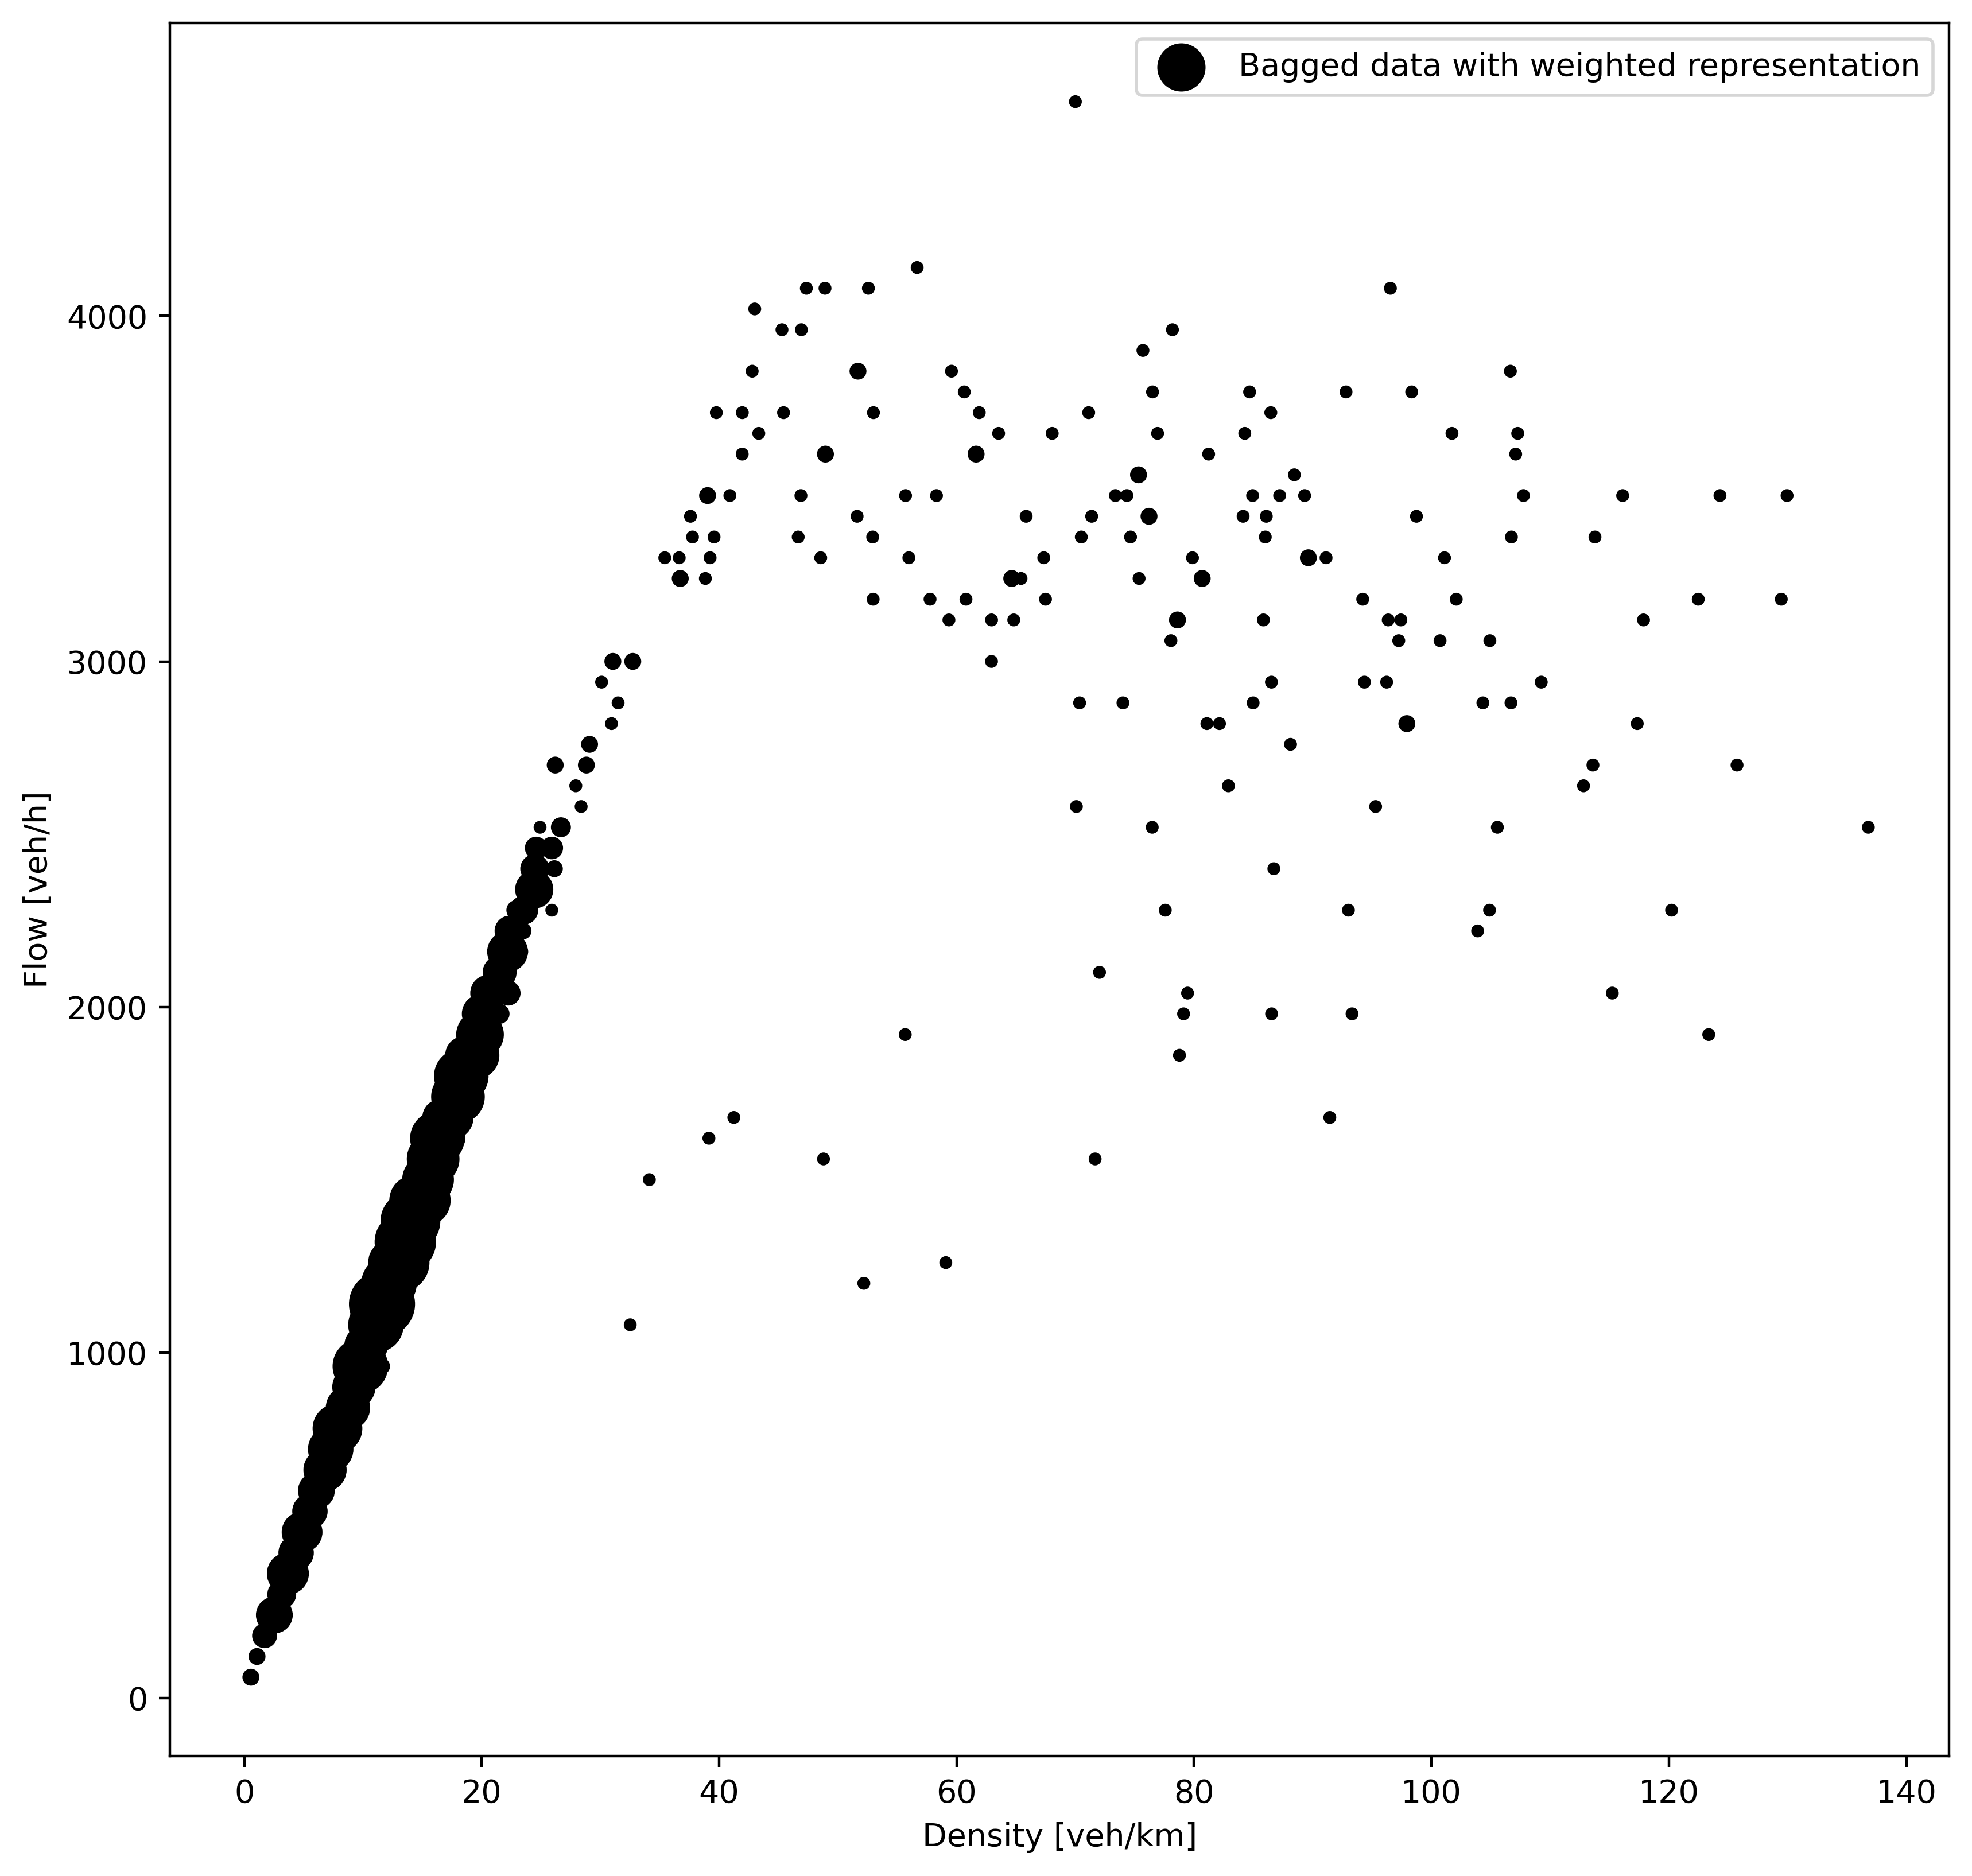

In [95]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.clf()
figure(figsize=(10, 10), dpi=400)
plt.scatter(df_bagged.centroid_density,df_bagged.centroid_flow, marker='o', c='black', s=df_bagged.weight*10000, label="Bagged data with weighted representation" )
plt.xlabel("Density [veh/km]")
plt.ylabel("Flow [veh/h]")
plt.legend()

<Figure size 432x288 with 0 Axes>

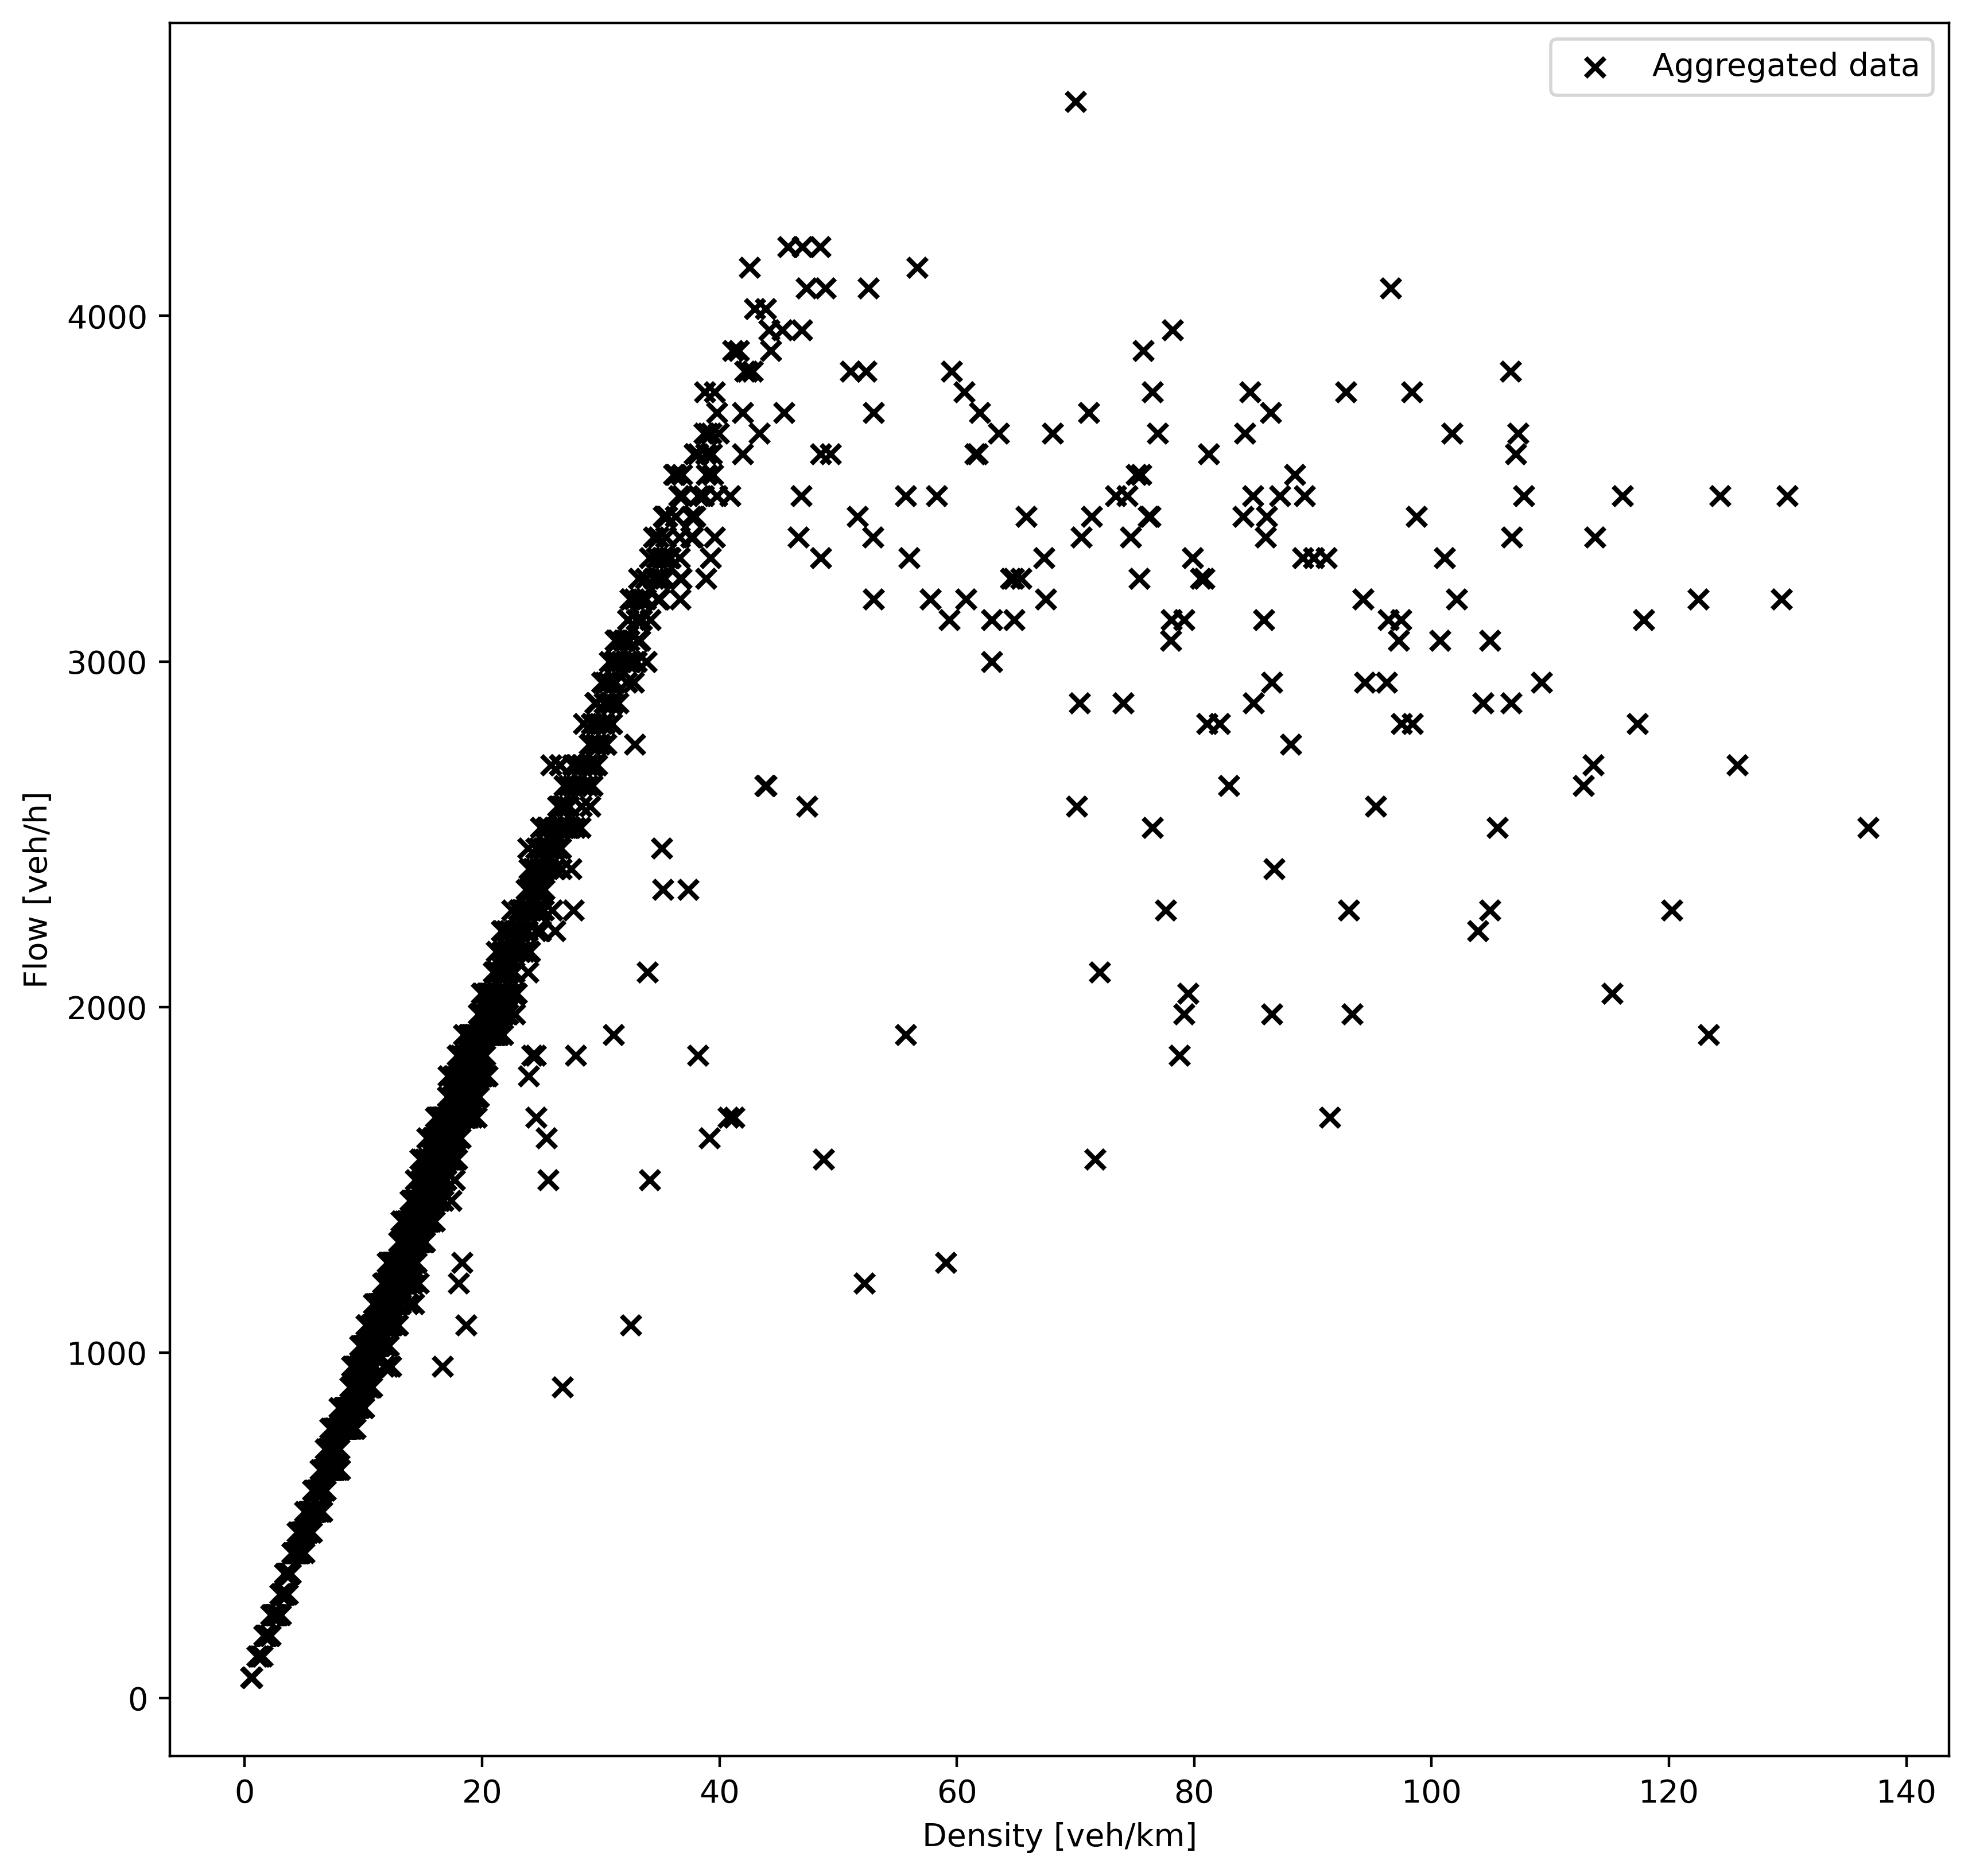

In [96]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.clf()
figure(figsize=(10, 10), dpi=400)
plt.scatter(df_agg.density,df_agg.hourlyflow, marker='x', c='black', label="Aggregated data")
plt.xlabel("Density [veh/km]")
plt.ylabel("Flow [veh/h]")
plt.legend()

In [97]:
sizex = maxDensity/gridx
sizey = maxFlow/gridy

xx = [sizex * i for i in range(gridx+1)]
yy = [sizey * i for i in range(gridy+1)]
yy

[0.0,
 23.1,
 46.2,
 69.30000000000001,
 92.4,
 115.5,
 138.60000000000002,
 161.70000000000002,
 184.8,
 207.9,
 231.0,
 254.10000000000002,
 277.20000000000005,
 300.3,
 323.40000000000003,
 346.5,
 369.6,
 392.70000000000005,
 415.8,
 438.90000000000003,
 462.0,
 485.1,
 508.20000000000005,
 531.3000000000001,
 554.4000000000001,
 577.5,
 600.6,
 623.7,
 646.8000000000001,
 669.9000000000001,
 693.0,
 716.1,
 739.2,
 762.3000000000001,
 785.4000000000001,
 808.5,
 831.6,
 854.7,
 877.8000000000001,
 900.9000000000001,
 924.0,
 947.1,
 970.2,
 993.3000000000001,
 1016.4000000000001,
 1039.5,
 1062.6000000000001,
 1085.7,
 1108.8000000000002,
 1131.9,
 1155.0,
 1178.1000000000001,
 1201.2,
 1224.3000000000002,
 1247.4,
 1270.5,
 1293.6000000000001,
 1316.7,
 1339.8000000000002,
 1362.9,
 1386.0,
 1409.1000000000001,
 1432.2,
 1455.3000000000002,
 1478.4,
 1501.5,
 1524.6000000000001,
 1547.7,
 1570.8000000000002,
 1593.9,
 1617.0,
 1640.1000000000001,
 1663.2,
 1686.3000000000002,
 17

Text(0, 0.5, 'Flow [veh/h]')

<Figure size 432x288 with 0 Axes>

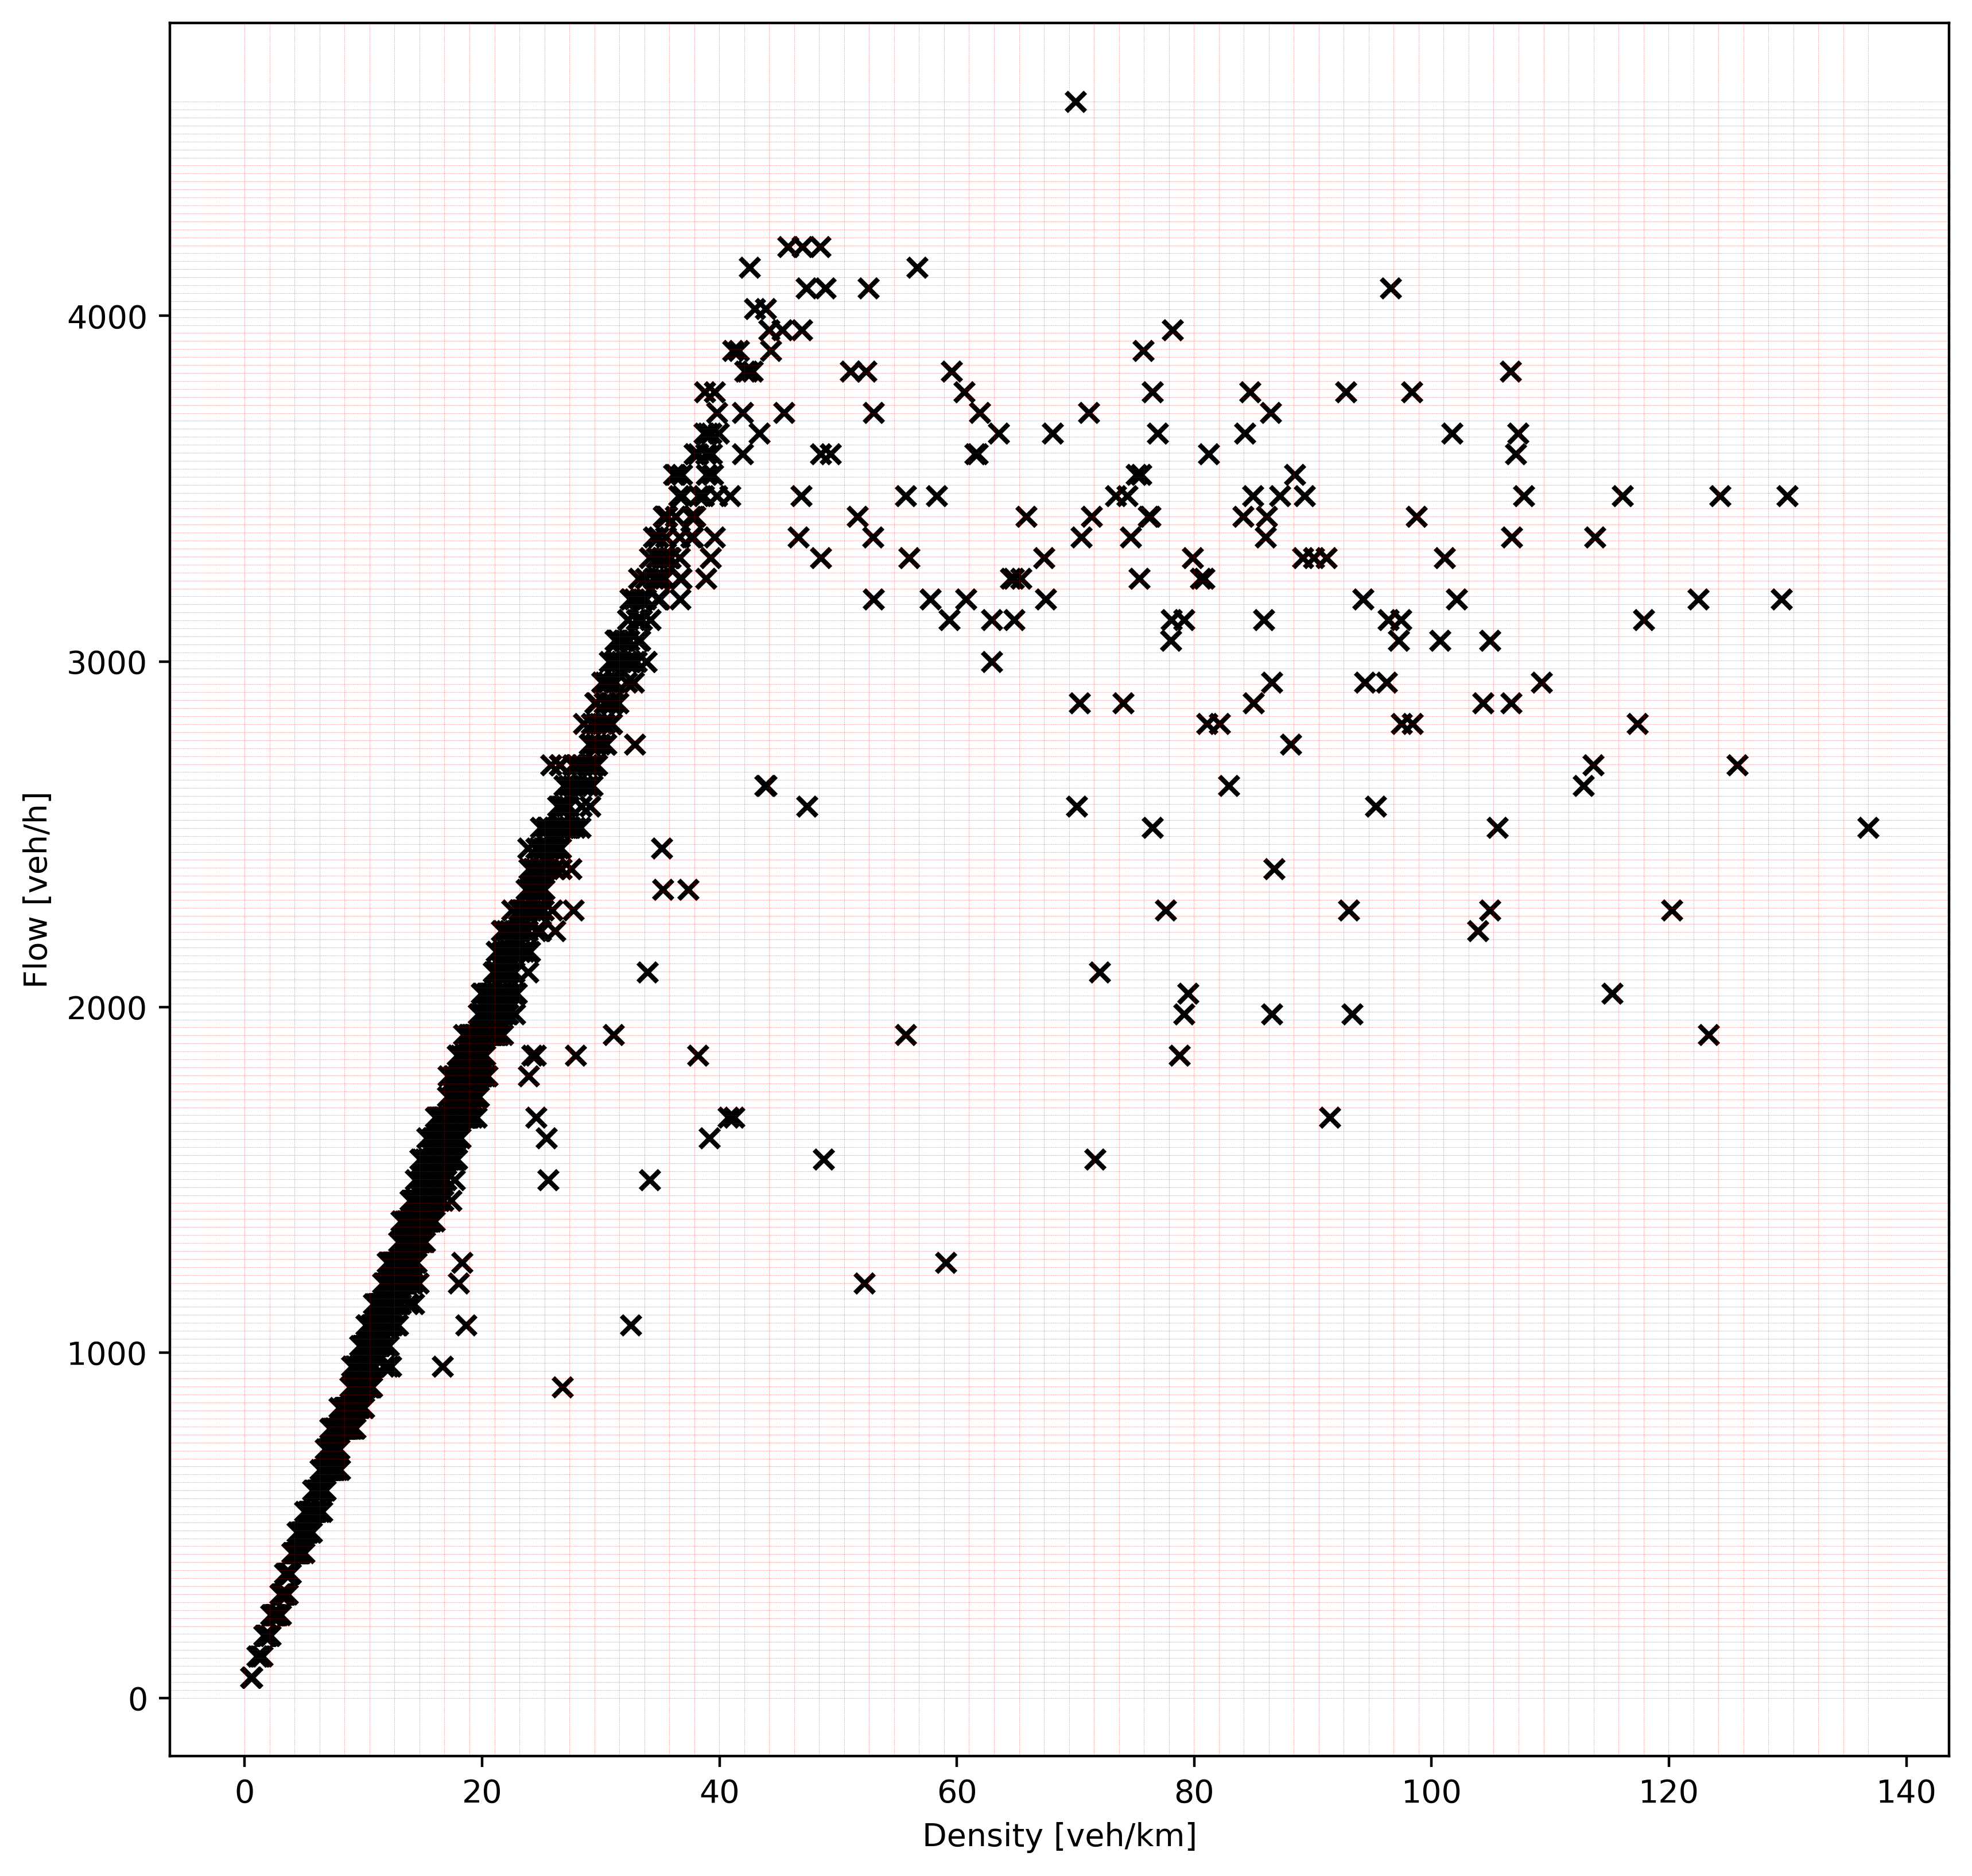

In [98]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.clf()
figure(figsize=(10, 10), dpi=400)
plt.scatter(df_agg.density,df_agg.hourlyflow, marker='x', c='black')
for item in xx: plt.axvline(x=item, ymin=0, color='red', linestyle='dotted', linewidth=0.1)
for it in yy: plt.axhline(y=it, xmin=0, color='red', linestyle='dotted', linewidth=0.1)
plt.xlabel("Density [veh/km]")
plt.ylabel("Flow [veh/h]")

In [99]:
df_bagged

,id,direction,grid_density,grid_flow,bag_size,sum_flow,sum_density,centroid_flow,centroid_density,weight
0,109,2,0,2,2,120.0,1.114551,60.0,0.557276,0.001854
1,109,2,0,5,2,240.0,2.147996,120.0,1.073998,0.001854
2,109,2,0,7,5,900.0,8.549917,180.0,1.709983,0.004634
3,109,2,1,7,1,180.0,2.129221,180.0,2.129221,0.000927
4,109,2,1,10,12,2880.0,30.394475,240.0,2.532873,0.011121
...,...,...,...,...,...,...,...,...,...,...
233,109,2,59,116,1,2700.0,125.736288,2700.0,125.736288,0.000927
234,109,2,59,150,1,3480.0,124.299350,3480.0,124.299350,0.000927
235,109,2,61,137,1,3180.0,129.461870,3180.0,129.461870,0.000927
236,109,2,61,150,1,3480.0,129.950665,3480.0,129.950665,0.000927


In [100]:
dirdata

,id,date,aggregation,direction,smspeed,flow,cars,buses,trucks,hourlyflow,hourlycars,hourlybuses,hourlytrucks,density,seconds,time,grid_density,grid_flow
1,109,2018-09-12,300,2,91.318565,7,5,2,0,420.0,300.0,120.0,0.0,4.599284,18000.0,05:00,2,18
3,109,2018-09-12,301,2,94.695525,12,9,1,2,720.0,540.0,60.0,120.0,7.603316,18060.0,05:01,3,31
5,109,2018-09-12,302,2,93.843504,6,5,0,1,360.0,300.0,0.0,60.0,3.836174,18120.0,05:02,1,15
7,109,2018-09-12,303,2,84.537969,3,1,2,0,180.0,60.0,120.0,0.0,2.129221,18180.0,05:03,1,7
9,109,2018-09-12,304,2,98.027751,5,5,0,0,300.0,300.0,0.0,0.0,3.060358,18240.0,05:04,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,109,2018-09-12,1374,2,98.297659,3,3,0,0,180.0,180.0,0.0,0.0,1.831173,82440.0,22:54,0,7
2150,109,2018-09-12,1375,2,106.990030,3,3,0,0,180.0,180.0,0.0,0.0,1.682400,82500.0,22:55,0,7
2152,109,2018-09-12,1376,2,91.797020,4,4,0,0,240.0,240.0,0.0,0.0,2.614464,82560.0,22:56,1,10
2154,109,2018-09-12,1377,2,95.595375,6,5,0,1,360.0,300.0,0.0,60.0,3.765873,82620.0,22:57,1,15


In [101]:
dirdata.to_excel('1.xlsx')

In [102]:
x = df_bagged.centroid_density
y = df_bagged.centroid_flow
w = df_bagged.weight

tau = [0.2, 0.5, 0.75, 0.95]
model = []
for t in tau:
    trafmod = wCQER.wCQR(y=y, x=x, w=w, tau=t, z=None, cet=CET_ADDI, fun=FUN_PROD, rts=RTS_VRS)
    trafmod.optimize(OPT_LOCAL)
    model.append(trafmod)

Optimizing locally.
Estimating the additive model locally with mosek solver.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 56882           
  Cones                  : 0               
  Scalar variables       : 1428            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.03    
Problem
  Name                   :                 
  Objective sense 

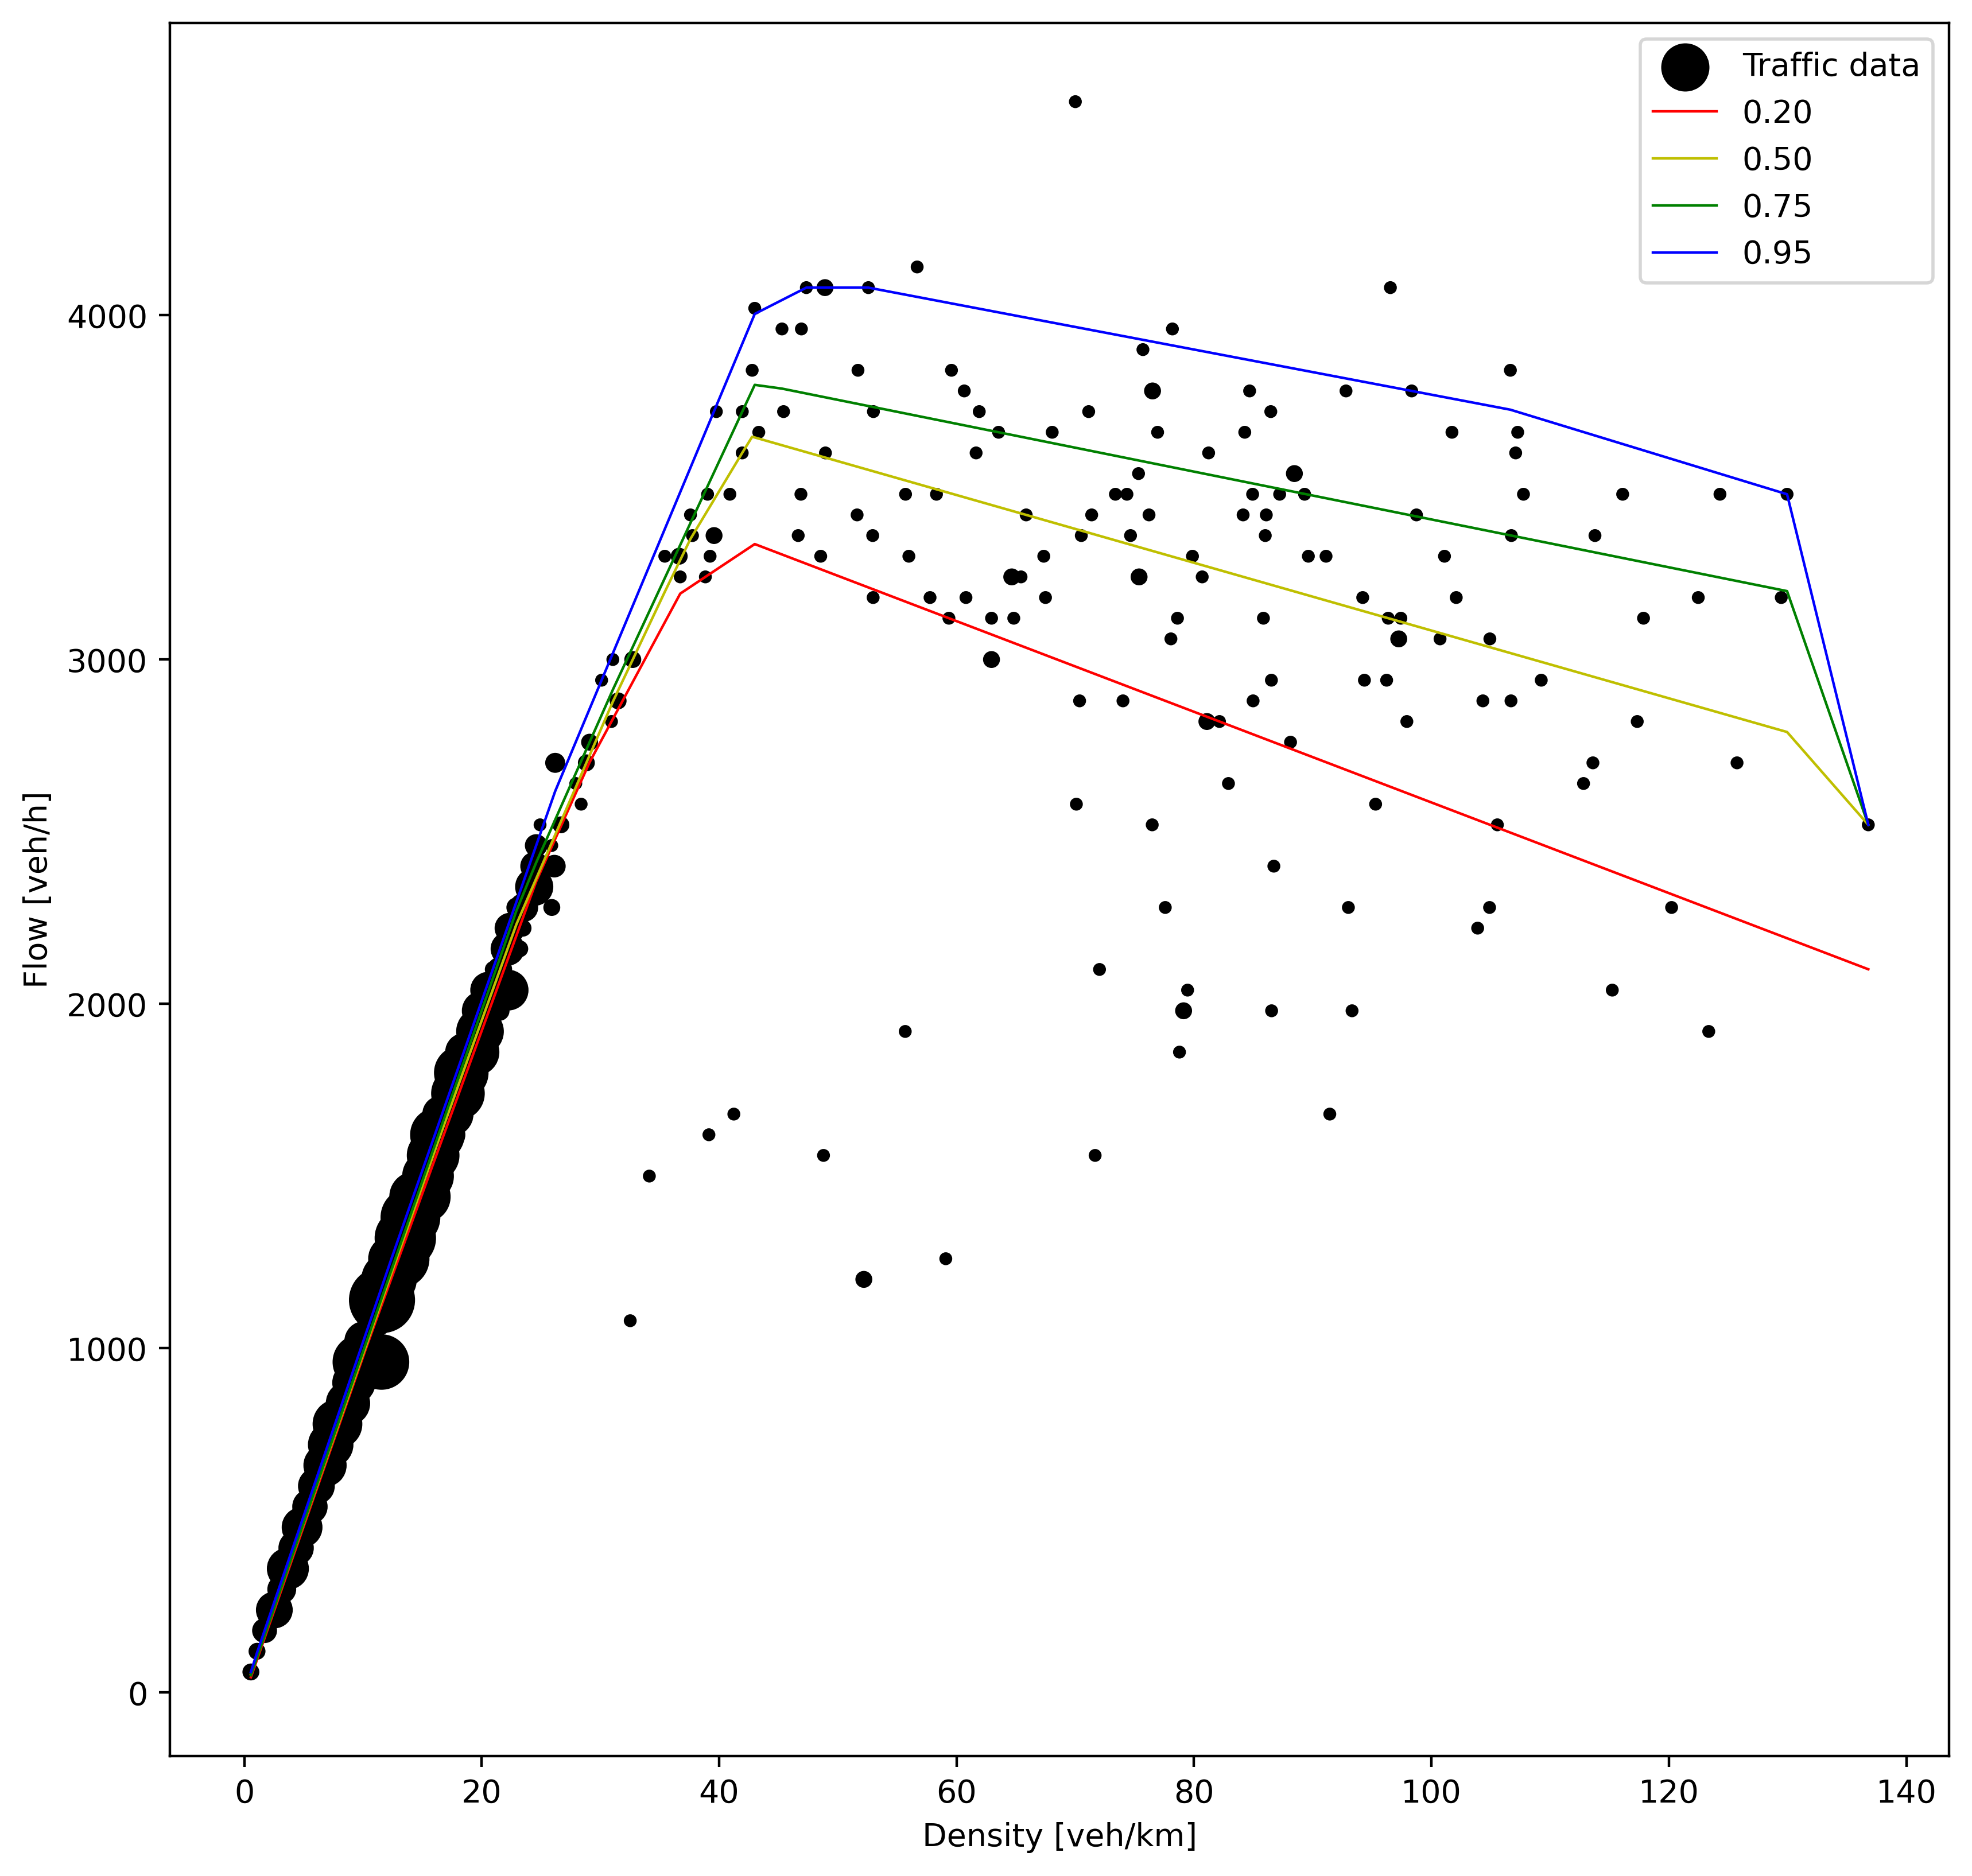

In [103]:
x = np.array(model[0].x).T[0]
y = np.array(model[0].y).T
yhat = np.array(model[0].get_frontier()).T
data = (np.stack([x, y, yhat], axis=0)).T
# sort
data = data[np.argsort(data[:, 0])].T
x1, y1, f1 = data[0], data[1], data[2]
fig, axs = plt.subplots(1, 1, figsize=(10, 10), dpi = 400, sharex='all', sharey='all')
axs.scatter(x1, y1, color="k", marker='o', s=w*10000, label="Traffic data")
axs.plot(x1, f1, color="r", label="0.20", linewidth=0.8)
yhat = np.array(model[1].get_frontier()).T
data = (np.stack([x, y, yhat], axis=0)).T
data = data[np.argsort(data[:, 0])].T
x1, y1, f1 = data[0], data[1], data[2]
axs.plot(x1, f1, color="y", label="0.50", linewidth=0.8)
yhat = np.array(model[2].get_frontier()).T
data = (np.stack([x, y, yhat], axis=0)).T
data = data[np.argsort(data[:, 0])].T
x1, y1, f1 = data[0], data[1], data[2]
axs.plot(x1, f1, color="g", label="0.75", linewidth=0.8)
yhat = np.array(model[3].get_frontier()).T
data = (np.stack([x, y, yhat], axis=0)).T
data = data[np.argsort(data[:, 0])].T
x1, y1, f1 = data[0], data[1], data[2]
axs.plot(x1, f1, color="b", label="0.95", linewidth=0.8)
plt.xlabel("Density [veh/km]")
plt.ylabel("Flow [veh/h]")
axs.legend()

<Figure size 432x288 with 0 Axes>

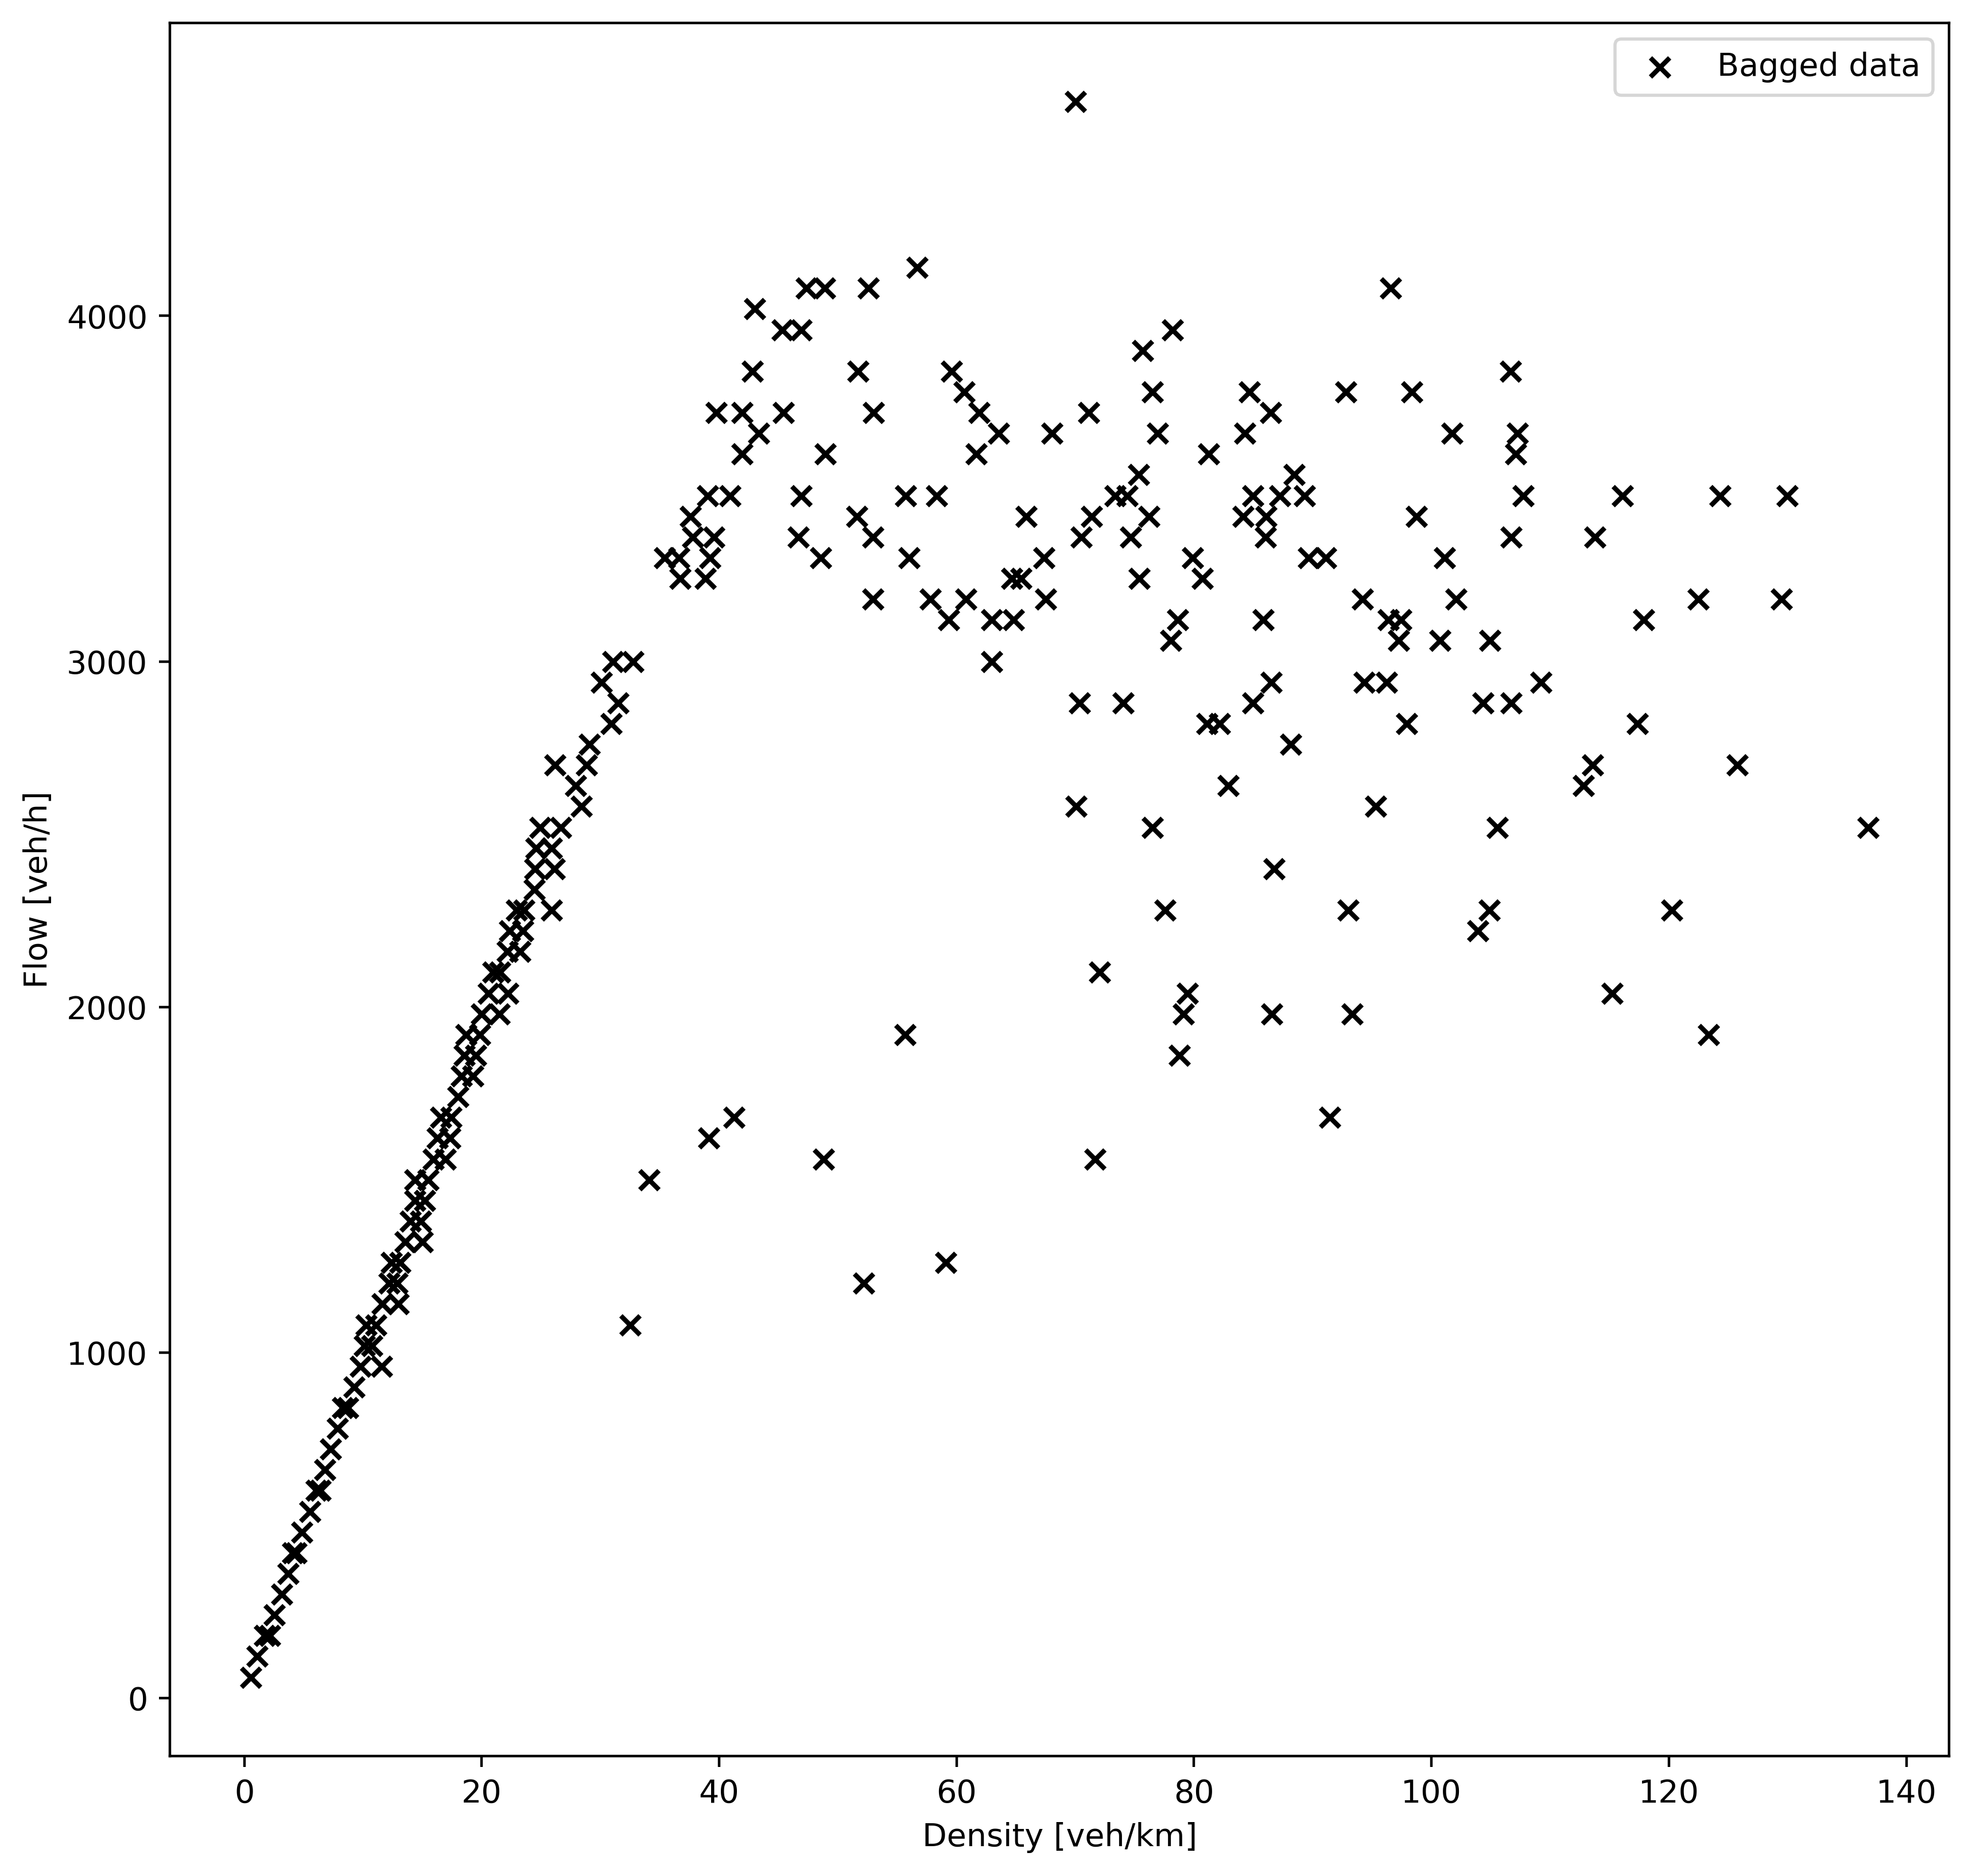

In [104]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.clf()
figure(figsize=(10, 10), dpi=400)
plt.scatter(df_bagged.centroid_density,df_bagged.centroid_flow, marker='x', c='black', label="Bagged data" )
plt.xlabel("Density [veh/km]")
plt.ylabel("Flow [veh/h]")
plt.legend()